Problem Statement - 
Analyze what factors are important in graduate admissions and how these factors are interrelated among themselves. 
It will also help predict one's chances of admission given the rest of the variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df = df.drop(["Serial No."],axis=1)

In [4]:
df.shape

(500, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


##### All the data are in number format.

In [6]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.isnull().sum()/len(df)*100

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

##### we do not have any empty data

In [9]:
#outlier treatment
for i,j in enumerate(list(df.select_dtypes(np.number).columns)):
    q1=df[j].quantile(0.25)
    q3=df[j].quantile(0.75)
    iqr=q3-q1

    df=df[(df[j]>=q1-1.5*iqr)&(df[j]<=q3+1.5*iqr)]

In [10]:
df.shape

(497, 8)

##### As per the description and shape, we it can be concluded that the data do not have outliers and no duplication in data.

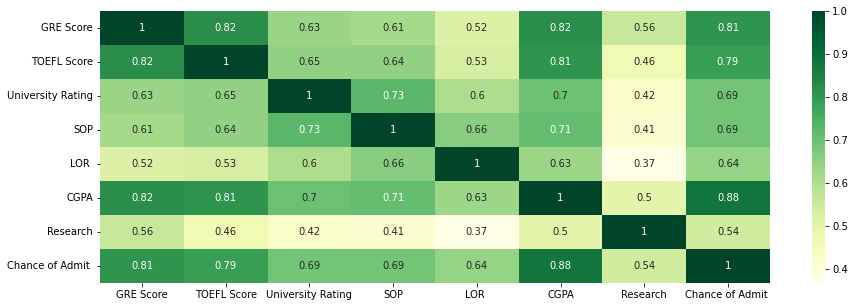

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True ,cmap="YlGn" )
plt.show()

##### CGPA score is more correlated to Chance of Admit followed by GRE and TOEFL score

<AxesSubplot:xlabel='TOEFL Score bins', ylabel='Chance of Admit '>

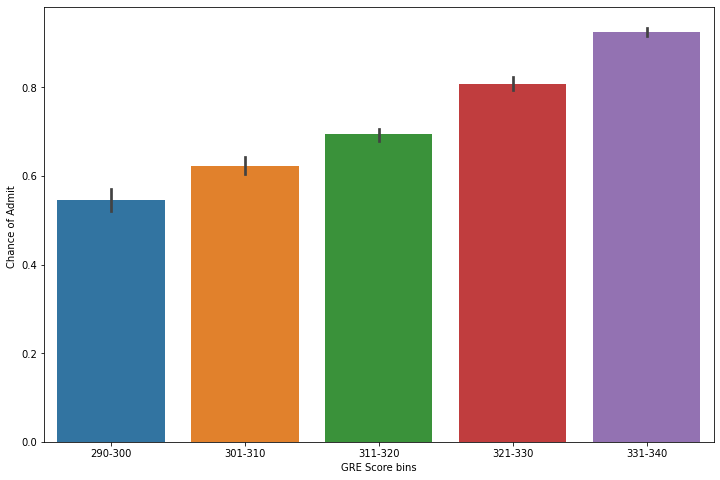

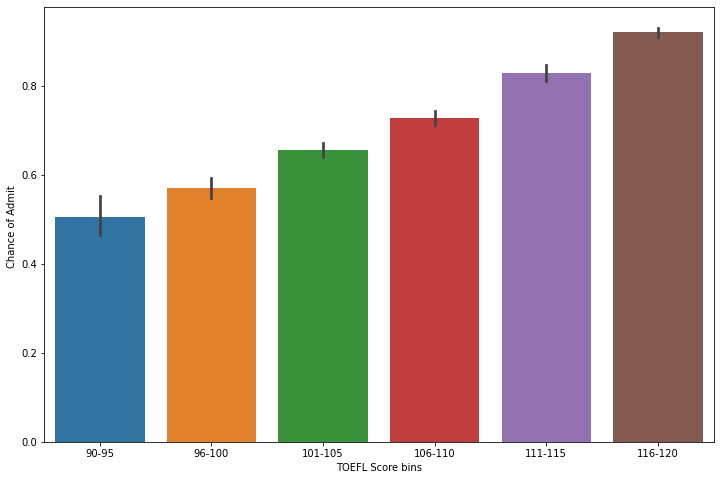

In [12]:
df['GRE Score bins']=pd.cut(x=df['GRE Score'], bins=[290,300,310,320,330,340],labels=['290-300','301-310','311-320','321-330','331-340'])

df['TOEFL Score bins']=pd.cut(x=df['TOEFL Score'], bins=[90,95,100,105,110,115,120],labels=['90-95','96-100','101-105','106-110','111-115','116-120'])

plt.figure(figsize=(12,8))
sns.barplot(x='GRE Score bins', y='Chance of Admit ', data=df)

plt.figure(figsize=(12,8))
sns.barplot(x='TOEFL Score bins', y='Chance of Admit ', data=df)

##### As we can see, more the score, more is the chance of getting admission.

d:\testautomation\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\testautomation\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Research', ylabel='count'>

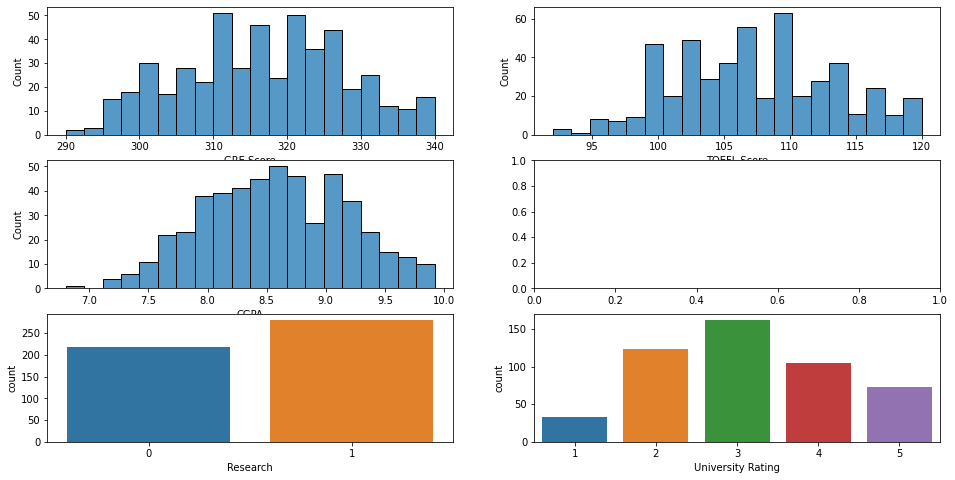

In [13]:
fig,axes=plt.subplots(3,2,figsize=(16,8))
sns.color_palette("pastel")
sns.histplot(df['GRE Score'],ax=axes[(0,0)],bins=20,palette=['red'])
sns.histplot(df['TOEFL Score'],ax=axes[(0,1)],bins=20)
sns.histplot(df['CGPA'],ax=axes[(1,0)],bins=20)
sns.countplot(df['University Rating'],ax=axes[(2,1)])
sns.countplot(df['Research'],ax=axes[(2,0)])


In [14]:
##Assumptions for Linear Regression

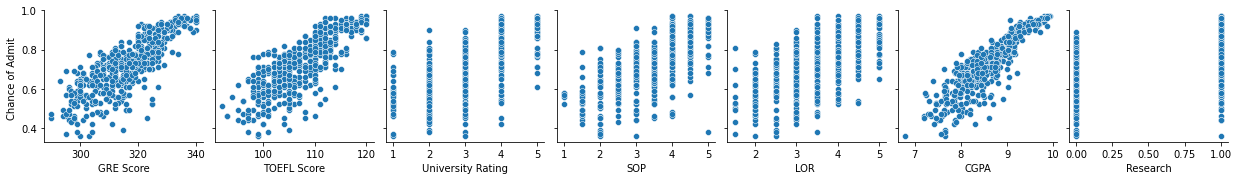

In [15]:
#1. Linearity
sns.pairplot(
    df,
    x_vars=["GRE Score", "TOEFL Score", "University Rating",'SOP', 'LOR ', 'CGPA', 'Research'],
    y_vars=["Chance of Admit "],
)

In [16]:
#Some of the features makes no sense to perform linear regression

In [18]:
df = df.drop(['GRE Score bins', 'TOEFL Score bins'],axis=1)

In [40]:
##Linear Regression using statsmodel

import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler

X = df.drop(['Chance of Admit '],axis=1)
y = df["Chance of Admit "] 
sc = StandardScaler()
cols = X.columns
X[cols] = sc.fit_transform(X[cols])

X_sm = sm.add_constant(X)
sm_model = sm.OLS(Y, X_sm).fit()
print(sm_model)
print(sm_model.summary())

print("coefficient of features",sm_model.params)

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     323.3
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          6.00e-179
Time:                        23:50:54   Log-Likelihood:                 706.09
No. Observations:                 497   AIC:                            -1396.
Df Residuals:                     489   BIC:                            -1363.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7239      0.00

In [28]:
#Linear Regression Using sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.20)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

r2_sq = r2_score(y_true=y_train,y_pred=y_pred)
print("R squared: {}".format(r2_sq))

adjr2_sq = 1 - ((1-r2_sq)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R squared: ", np.round(adjr2_sq, 2))

R squared: 0.8388196689520717
Adjusted R squared:  0.83


In [29]:
#2. Mean Residual

In [30]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.2234825523262115e-16


In [31]:
#very close to zero so all good here.

In [32]:
#3. Check for homoscedasticity

d:\testautomation\python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


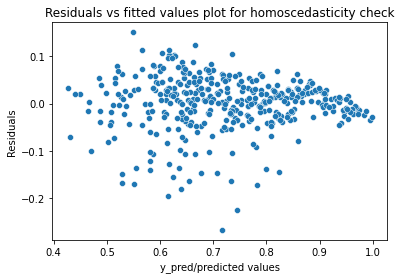

In [33]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [34]:
#heteroskedasticity exists in our data

In [35]:
#4. Normality

d:\testautomation\python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


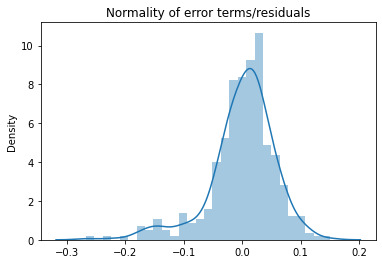

In [36]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [37]:
#Pretty much normally distributed

In [38]:
#5.Multicollinearity

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.70
0,GRE Score,4.40
1,TOEFL Score,3.84
3,SOP,2.84
2,University Rating,2.60
4,LOR,2.00
6,Research,1.48


In [42]:
#All the VIFs are under 5, so we can take all columns.

In [43]:
# Ridge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
rr = Ridge(alpha=0.01)
rr.fit(X_sm, Y) 
pred_train_rr= rr.predict(X_sm)
print(np.sqrt(mean_squared_error(Y,pred_train_rr)))
print(r2_score(Y, pred_train_rr))

0.05844708388086402
0.8223259980781796


In [44]:
# Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
rr = Lasso(alpha=0.01)
rr.fit(X_sm, Y) 
pred_train_rr= rr.predict(X_sm)
print(np.sqrt(mean_squared_error(Y,pred_train_rr)))
print(r2_score(Y, pred_train_rr))

0.05982999456487407
0.813818675323295
